# Getting the necessary data

You just need to download this ~28 MB file only once

In [1]:
#se descargo un archivo fastQ como ejemplo "SRR003265.filt.fastq.gz"(yo tengo los mios)
!rm -f SRR003265.filt.fastq.gz 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

--2021-04-06 13:57:50--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => 'SRR003265.filt.fastq.gz'
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.197.77
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.197.77|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

SRR003265.filt.fast 100%[===================>]  27.58M  6.96MB/s    in 6.2s    

2021-04-06 13:57:58 (4.45 MB/s) - 'SRR003265.filt.fastq.gz' saved [28919712]



# The recipe

In [3]:
from collections import defaultdict
import gzip                         #importante para abrir el archivo

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

In [7]:

recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations)

SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


In [11]:
#vemos la distribucion de nucleotidos en los reads vemos que tenemos algunas "N"
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        cnt[letter] += 1
tot = sum(cnt.values())
for letter, cnt in cnt.items():
    print('%s: %.2f %d' % (letter, 100. * cnt / tot, cnt))

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


(1.0, 51.0)

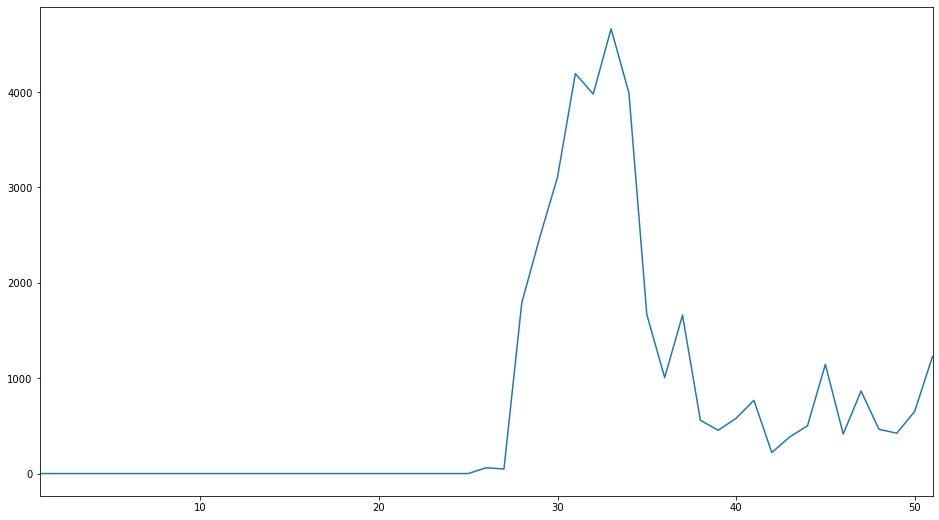

In [10]:
#aqui graficamos la distribucion de "N" en la posicion de los reads 
#observamos que no hay "N" hasta la posicion 25, esto por que estos af=rchivos ya han sido depurados
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='UTF-8'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)

In [14]:
#Aqui vemos la distribucion del Phred score en nuestros reads

recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


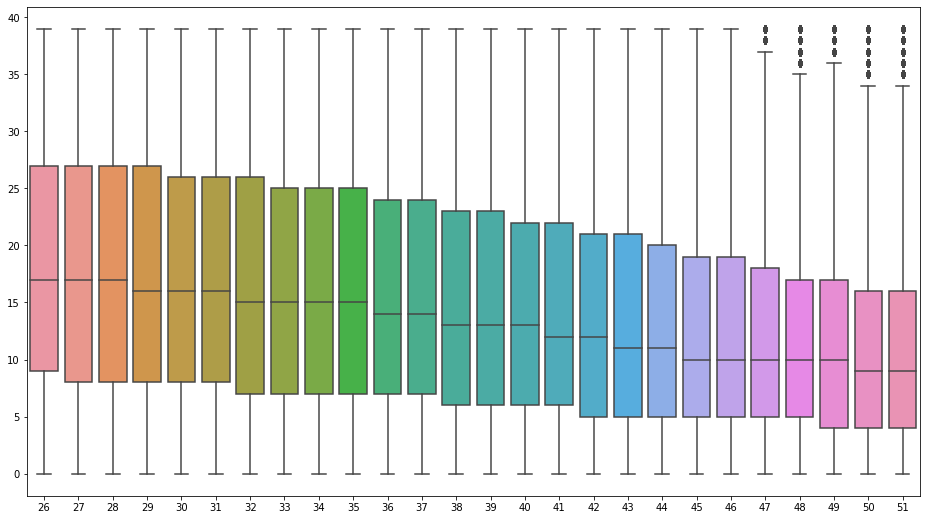

In [15]:
#graficamos los Phred Scores pero ponemos una condicion para ignorar los primeros 25 nucleotidos 
#y los que tienen un score de 40, si no hacemos eso la grafica nos va a mostrar cosas raras en este caso  

recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = list(qual_pos.keys())
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
pass

# There is more...

## Do this to download the paired end data

Be careful as this will be 1GB of data (and fully optional)

In [16]:
#XXX change
#esto es importante para trabajar con reads pareados!!!

!rm -f SRR003265_1.filt.fastq.gz 2>/dev/null
!rm -f SRR003265_2.filt.fastq.gz 2>/dev/null
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265_1.filt.fastq.gz
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265_2.filt.fastq.gz

--2021-04-06 14:21:16--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265_1.filt.fastq.gz
           => 'SRR003265_1.filt.fastq.gz'
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.197.77
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.197.77|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265_1.filt.fastq.gz ... 502660639
==> PASV ... done.    ==> RETR SRR003265_1.filt.fastq.gz ... done.
Length: 502660639 (479M) (unauthoritative)

SRR003265_1.filt.fa 100%[===================>] 479.37M  18.9MB/s    in 31s     

2021-04-06 14:21:49 (15.3 MB/s) - 'SRR003265_1.filt.fastq.gz' saved [502660639]

--2021-04-06 14:21:49--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265_2.filt.fastq.gz
           => 'SRR003265_2.filt.fast

In [17]:
#aqui asigno f1 y f2 diciendole que tipo de archivos son y donde estan
#recs1 y recs2 son las secuencias
f1 = gzip.open('SRR003265_1.filt.fastq.gz', 'rt', encoding='utf-8')
f2 = gzip.open('SRR003265_2.filt.fastq.gz', 'rt', encoding='utf-8')
recs1 = SeqIO.parse(f1, 'fastq')
recs2 = SeqIO.parse(f2, 'fastq')
cnt = 0
for rec1 in recs1:
    next(recs2)
    cnt +=1
print('Number of pairs: %d' % cnt)   #me imprime el numero de pares (secuencias pareadas)

Number of pairs: 9170808


## Only do the next cell on Python 3

In [18]:
#es lo mismo que en la celda anterior
f1 = gzip.open('SRR003265_1.filt.fastq.gz', 'rt', encoding='utf8')
f2 = gzip.open('SRR003265_2.filt.fastq.gz', 'rt', encoding='utf8')
recs1 = SeqIO.parse(f1, 'fastq')
recs2 = SeqIO.parse(f2, 'fastq')
cnt = 0
for rec1, rec2 in zip(recs1, recs2):
    cnt +=1

print('Number of pairs: %d' % cnt)

Number of pairs: 9170808


In [21]:
#parece que puedo hacer lo mismo que en el apartado anterior usando este "FOR" 
#no lo uses a menos que tengas tiempo

f1 = gzip.open('SRR003265_1.filt.fastq.gz', 'rt', encoding='utf8')
f2 = gzip.open('SRR003265_2.filt.fastq.gz', 'rt', encoding='utf8')
recs1 = SeqIO.parse(f1, 'fastq')
recs2 = SeqIO.parse(f2, 'fastq')

cnt = defaultdict(int)
for rec1, rec2 in zip(recs1, recs2):
    for letter in rec.seq:
        cnt[letter] += 1
tot = sum(cnt.values())
for letter, cnt in cnt.items():
    print('%s: %.2f %d' % (letter, 100. * cnt / tot, cnt))



T: 25.49 119220504
C: 25.49 119220504
A: 31.37 146732928
G: 17.65 82537272
